In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_array=cv2.imread("with_mask_1.jpg")

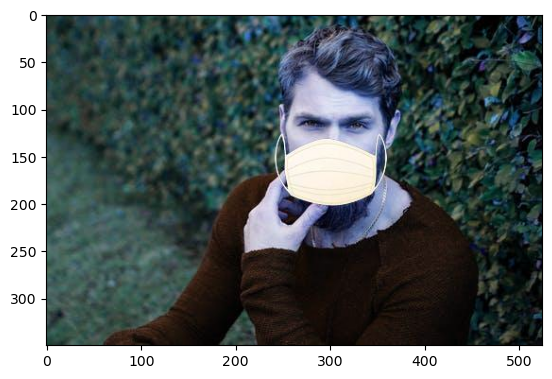

In [4]:
plt.imshow(img_array)

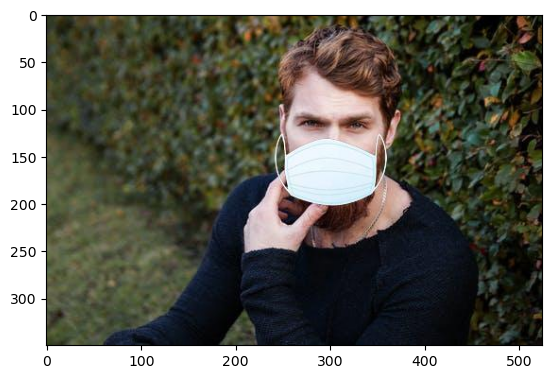

In [5]:
plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))

In [6]:
img_array.shape

(350, 525, 3)

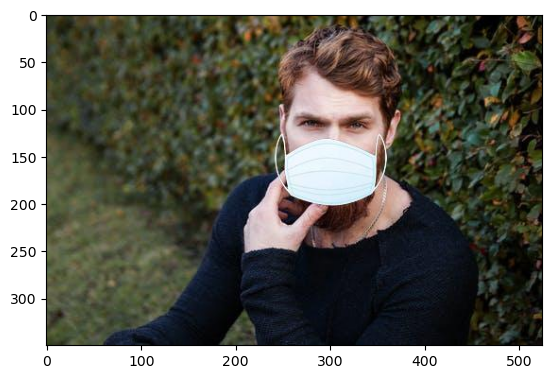

In [7]:
Datadirectory=r"C:\Users\SUHAIL MALIK\Desktop\face mask dataset kaggle\data"
classes=["Face_mask","No_mask"]
for category in classes:
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break    
        

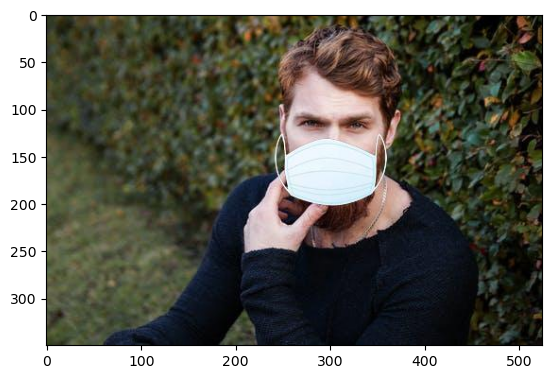

In [8]:
img_size=224
new_image=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
plt.show()

# reading the images and convert all to array

In [9]:
training_data=[]
def create_training_data():    
    for category in classes:
        path=os.path.join(Datadirectory,category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [10]:
create_training_data()

In [11]:
print(len(training_data))

7553


In [12]:
import random
random.shuffle(training_data)

In [13]:
x=[]
y=[]
for features,labels in training_data:
    x.append(features)
    y.append(labels)
x=np.array(x).reshape(-1,img_size,img_size,3)    

In [14]:
x.shape

(7553, 224, 224, 3)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size=32
# Assuming x is your image data
generator = datagen.flow(x, batch_size=batch_size)

In [16]:
y[1000]

1

In [17]:
y=np.array(y)

In [18]:
# inbuilt function to preprocessing images

In [19]:
import pickle
pickle_out=open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [20]:
pickle_in=open("x.pickle","rb")
pickle.load(pickle_in)

pickle_in=open("y.pickle","rb")
pickle.load(pickle_in)

array([0, 0, 0, ..., 1, 1, 0])

# deep learning model for training -Transfer learning

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [22]:
model=tf.keras.applications.mobilenet.MobileNet() ## pre- trained model

In [23]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

# Transfer Learning - Tuning and weights will start from last checkpoint

In [24]:
base_input=model.layers[0].input

In [25]:
base_output=model.layers[-4].output

In [26]:
flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(flat_layer)
final_output=layers.Activation('sigmoid')(final_output)

In [27]:
new_model=keras.Model(inputs=base_input, outputs=final_output)

In [28]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

# settings for binary classification (Face mask/ without mask)

In [29]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [30]:
new_model.fit(x,y,epochs=1,validation_split=0.1)

213/213 [==============================] - 1873s 9s/step - loss: 0.0729 - accuracy: 0.9773 - val_loss: 0.5529 - val_accuracy: 0.9246


In [31]:
new_model.save('my_model')

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


In [32]:
new_model=tf.keras.models.load_model('my_model')

In [62]:
frame=cv2.imread("with_mask_4.jpg")

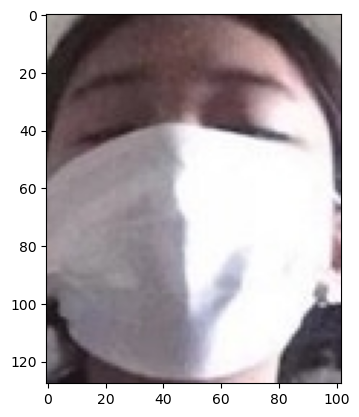

In [63]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [64]:
final_image=cv2.resize(frame,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [65]:
predictions=new_model.predict(final_image)

1/1 [==============================] - 0s 123ms/step


In [66]:
predictions

array([[0.04588175]], dtype=float32)

# checking network for unknown images

In [38]:
frame=cv2.imread("beautiful_lady.jpg")

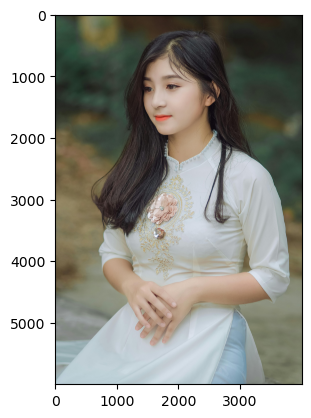

In [39]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [40]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [41]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [42]:
gray.shape

(6000, 4000)

In [43]:
faces=faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    faces=faceCascade.detectMultiScale(roi_gray)
    if len(faces)==0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in faces:
            face_roi=roi_color[ey:ey+eh, ex:ex+ew]

Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected


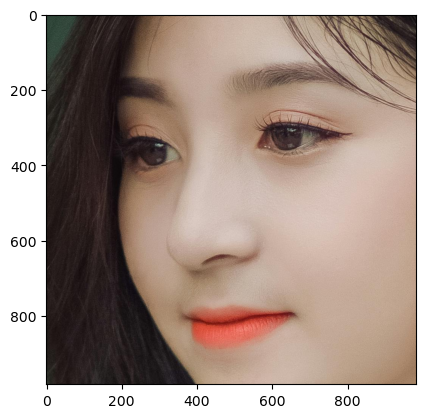

In [44]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [45]:
final_image=cv2.resize(face_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [46]:
predictions=new_model.predict(final_image)

1/1 [==============================] - 0s 86ms/step


In [47]:
predictions

array([[0.0465955]], dtype=float32)

# Realtime Video Demo

# Face Mask Detection

In [ ]:
import cv2
path="haarcascade_frontalface_default.xml"
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN

# set the rectangle bgr to white
rectangle_bgr=(255,255,255)
#make a black image
img=np.zeros((500,500))
#set some text
text="Some text in a box!"
# get the height and weight of textbox
(text_width, text_height)=cv2.getTextSize(text,font,fontScale=font_scale, thickness=1)[0]
# set the text start position
text_offset_x=10
text_offset_y=img.shape[0]-25
# make the coords of the box with a small padding of two pixels
box_coords=((text_offset_x,text_offset_y),(text_offset_x + text_width+2, text_offset_y-text_height-2))
cv2.rectangle(img, box_coords[0],box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font, fontScale=font_scale, color=(0,0,0), thickness=1)

#Check if webcam is opened correctly
cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame=cap.read()
   
        
    faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces[10]:
        roi_gray=gray[y:y+h, x:x+w]
        roi_color=frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        facess=faceCascade.detectMultiScale(roi_gray)
        if len(facess)==0:
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi=roi_color[ey:ey+eh, ex:ex+ew]
                
        final_image=cv2.resize(face_roi,(224,224))
        final_image=np.expand_dims(final_image,axis=0)
        final_image=final_image/255.0   
        font=cv2.FONT_HERSHEY_SIMPLEX
        predictions=new_model.predict(final_image)

        font_scale=1.5
        font=cv2.FONT_HERSHEY_PLAIN
       # print(predictions)
        if(predictions>0.045):
            status= "No Mask" 
        else:
            status="Mask Detected"
        
        x1,y1,w1,h1=0,0,175,175    
        # Draw black bgr rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1 + int(w1/10), y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0))
    
        cv2.imshow('Face Mask Detection',frame)
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()